# <span style="color:red"> Numerical Simulation 09 </span>

## Exercise 09.1

The traveling salesman problem cosist in a traveller that has to visit $N$ cities with the shortest path possible, visiting everey cities only once. To find the best path I have to minimize the following loss/cost function: $ L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|$. the path should close, so the legnth has to consider even the distance between the last city and the first.
The scheme I've used to express a possible path is a 1D vector whose elements are integers that represents the cities in the order in which the salesman would visit them.

To do this I've implemented a Genetic Algorithm, that simulates the evolution of a population. In this case the population is made of $N=100$ possible paths, and the idea is to create new generations from the shortests paths of the old generations, simulating an evolution in which the shortest is advantaged. To reduce degeneration of the best path the first city is set to $1$ and never moved. The metods I've implemented are:
- **length**, that calculate the lenth of the selected path with $L^{(1)}$.
- **check** method, that verify that every new element created has $1$ as first element, and that every city is visited, but only once.
- **selection** operator: it selects the element to modify and pass to the new generation based on it's length. Indeed I call it after having ordered my population, and it select an element $i=int(N*r^p)$, where $r$ is randomly generated in $(0,1)$, and $p=2$. I've choose this value for $p$ because it seemed a good compromise between a rapid convergence and avoiding stucking in a local minimum. This operator is forced to never select element 0.
- mutation 1:  **permutation** operator, that swaps a city $i$ with another of the vector $j$. The index of the swapped city are chose randomly (excluding index 0).
- mutation 2:  **shift** operator, that selects a set $m$ of cities and shifts them of $n$ positions, with periodic buondary conditions, so if the cities exits from the vector, they re-enter starting from position $1$ (the pbc funtcion automatically excludes index $0$). $n$ and $m$ are chosen randomly in $(1,N-1)$, and even the starting point of this shift is chosen randomly. 
- mutation 3: **permutation** of $m$ **contigous** cities, that select randomly $m<N/2$ cities and swaps them with the $m$ contigous cities. In this case the starting point is chosen in $(1,N-2m)$, to avoid exceeding the size of vector.
- mutation 4: **inversion**, that select $m$ cities and resave them in the opposite order. $m$ is chosen randomly in $(1,N-1)$, and the strating point is randomly selected in $(1,N-m)$.
- **crossover** operator, that cross two selected paths, generating two new paths. Once the parents are selected, I randomly generate an index $i$, and copy the cities of the two parents in the sons until $i$. The missing cities are inserted in the son, after $i$, in the order they are found in the other parent. In this way tha cities are always all visited but in a different order.



These methods are organized in two classes:
- **element** class: it represents an individual path, with it's length, the method "check", and all the methods of "mutation".
- **population** class: it contains a vector of $N$ element, that are all the possible paths. It contains the method "crossover", the "selection" method, and a method "mutation" that, once applied on an element, randomly selects which one of the four methods of mutation to use. 

To generate the starting population I start from an element with cities ordered from $1$ to $N_{cities}$, and create the element $i+1$ permutating the $i$ one. Once the starting population is set, I've a method that **generates** the new generation. This works selecting the best element of the old generation and saving it directly in the new one. Then I select $N/2$ times two elements (excluding element 0 from this selection), a father and a mother, with the selection operator, trying to mutate and cross them (with probabilities $p_{mut}$, $p_{cross}$ set from imput), and save the new elements (or the old ones) in the new generation. Each time I call this metod I create a full new generation, that then I order, and I'm ready to restart. So an "iteration" is made of one calling of this method.

Using this algorithm I've found out that convergence is much faster in the case of the city on the circle and slower for the square, but I've also cheked that the number of steps needed changes a lot changing the seed of the random generator. At each iteration I've saved the length of the best path, and the average length of the best half of my population. I've the plotted this quantities as a function of the iterations. I've also plotted the best path, in which it's very easy to see that the algorithm works.

I've applied my code to two different disposition of cities, using $p_{cross}=60$% and $p_{mut}=8$%:

- <span style="color:red"> $32$ cities randomly placed on a circle of radius $1$ </span>

Length of best path=  6.1997942


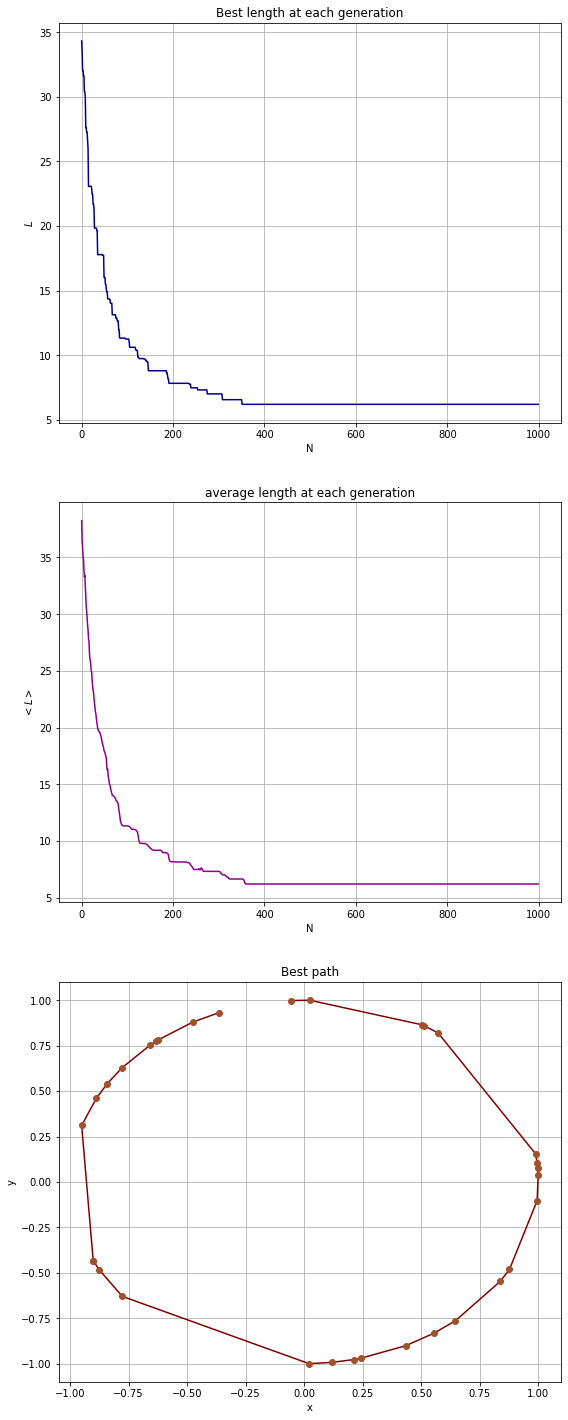

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(1000)

L=np.loadtxt("L_round.dat")
L_ave=np.loadtxt("L_ave_round.dat")
x_best, y_best=np.loadtxt("coord_best_round.dat", unpack=True)

fig=plt.figure(figsize=(9,25))
plt.subplot(311)
plt.plot(x, L, color="darkblue")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("Best length at each generation")
plt.grid(True)

plt.subplot(312)
plt.plot(x, L_ave, color="darkmagenta")
plt.xlabel('N')
plt.ylabel('$<L>$')
plt.title("average length at each generation")
plt.grid(True)

plt.subplot(313)
plt.plot(x_best, y_best, color="maroon")
plt.plot(x_best, y_best, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path")
plt.grid(True)

print("Length of best path= ", L[1000-1])

plt.show()

- <span style="color:red">$32$ cities randomly placed in a square of side $1$ </span>

Length of best path=  4.7383836


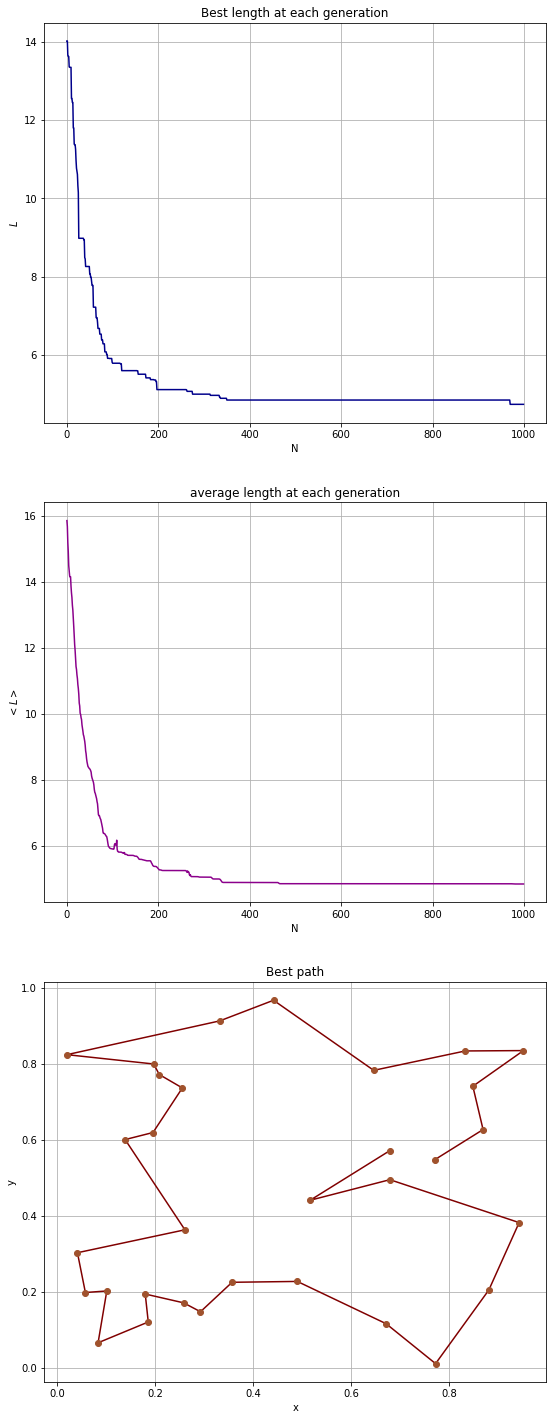

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(1000)

L=np.loadtxt("L_square.dat")
L_ave=np.loadtxt("L_ave_square.dat")
x_best, y_best=np.loadtxt("coord_best_square.dat", unpack=True)

fig=plt.figure(figsize=(9,25))
plt.subplot(311)
plt.plot(x, L, color="darkblue")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("Best length at each generation")
plt.grid(True)

plt.subplot(312)
plt.plot(x, L_ave, color="darkmagenta")
plt.xlabel('N')
plt.ylabel('$<L>$')
plt.title("average length at each generation")
plt.grid(True)

plt.subplot(313)
plt.plot(x_best, y_best, color="maroon")
plt.plot(x_best, y_best, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path")
plt.grid(True)

print("Length of best path= ", L[1000-1])

plt.show()

**Notes**: After exercise 10 I've discovered that I've underestimated the number of steps needed to find the minimun, so I've decided to rerun the square with $4000$ steps, and this is the result. I've decided to leave also the first result because I think it's still a good result, considering it's obtained with 1/4 of the steps.

Length of best path=  4.7245957


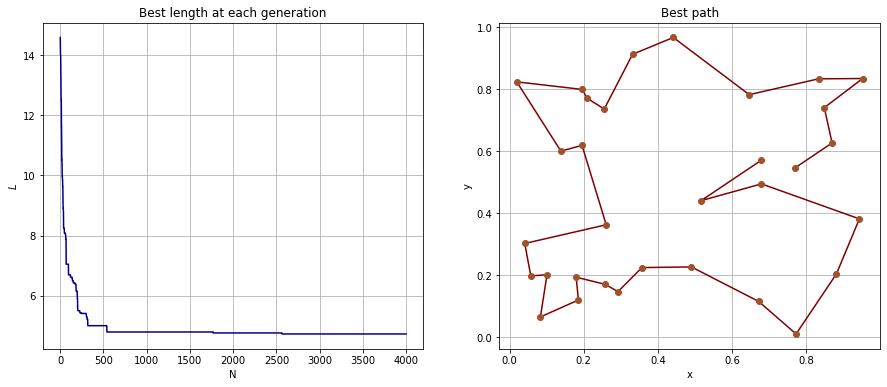

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(4000)

L=np.loadtxt("L_square.long")
x_best, y_best=np.loadtxt("coord_best_square.long", unpack=True)

fig=plt.figure(figsize=(15,6))
plt.subplot(121)
plt.plot(x, L, color="darkblue")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("Best length at each generation")
plt.grid(True)

plt.subplot(122)
plt.plot(x_best, y_best, color="maroon")
plt.plot(x_best, y_best, 'bo',color="sienna")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path")
plt.grid(True)

print("Length of best path= ", L[4000-1])

plt.show()